In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle competitions download -c digit-recognizer

In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
!ls

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [5]:
train = pd.read_csv("/content/gdrive/My Drive/Kaggle/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Kaggle/test.csv")

In [6]:
train.shape


(42000, 785)

In [7]:
test.shape


(28000, 784)

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
target = train.pop("label")

In [10]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
train = train/255.0
test = test/255.0

In [12]:
pd.set_option('display.max_columns', 35)

In [13]:
target = to_categorical(target, 10)

In [14]:
train = train.values.reshape(-1, 28,28,1)
test = test.values.reshape(-1,28,28,1)

In [15]:
print(train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(train, target, test_size = 0.1, random_state = 2)

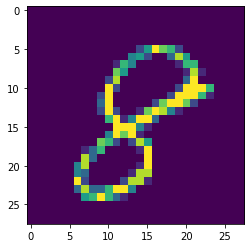

In [17]:
plt.imshow(X_train[0][:,:,0])

In [18]:
# import other libs as needed for building model
from tensorflow.keras.callbacks import ModelCheckpoint

# add a checkpoint to save the lowest validation loss
filepath = 'digit_model.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode='auto', save_frequency=1)


In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [42]:

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [43]:
history = model.fit(X_train, Y_train, epochs= 50, validation_data=(X_val, Y_val), callbacks=[checkpoint])

Epoch 1/50
1176/1182 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.8702
Epoch 00001: val_loss did not improve from 0.02436
1182/1182 [==============================] - 4s 3ms/step - loss: 0.4282 - accuracy: 0.8704 - val_loss: 0.1221 - val_accuracy: 0.9626
Epoch 2/50
1169/1182 [============================>.] - ETA: 0s - loss: 0.1275 - accuracy: 0.9600
Epoch 00002: val_loss did not improve from 0.02436
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1276 - accuracy: 0.9601 - val_loss: 0.0853 - val_accuracy: 0.9733
Epoch 3/50
1178/1182 [============================>.] - ETA: 0s - loss: 0.0940 - accuracy: 0.9702
Epoch 00003: val_loss did not improve from 0.02436
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0945 - accuracy: 0.9702 - val_loss: 0.0659 - val_accuracy: 0.9776
Epoch 4/50
1179/1182 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9749
Epoch 00004: val_loss did not improve from 0.02436
1182/

In [44]:
new_model = keras.models.load_model(filepath)

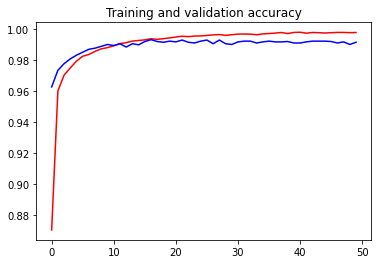

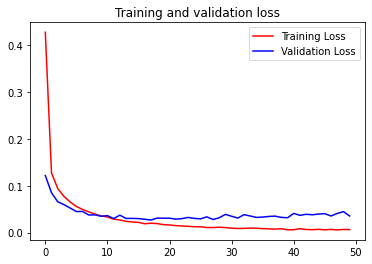

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
predictions = new_model.predict(test)

In [47]:
predictions[1]

array([9.9998939e-01, 9.3099253e-09, 1.4440908e-06, 5.7825689e-10,
       5.1764073e-06, 3.0694494e-07, 9.0790707e-07, 1.8104632e-06,
       2.0460555e-09, 1.0036990e-06], dtype=float32)

In [48]:
prediction = tf.math.argmax(predictions, 1)

In [49]:
prediction

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

In [50]:
pred = pd.DataFrame(prediction, columns=["Label"])

In [51]:
submission = pd.read_csv("/content/gdrive/My Drive/Kaggle/sample_submission.csv")

In [52]:
submission["Label"] = prediction

In [53]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [54]:
submission.to_csv("mypredictions.csv", index=False)